In [19]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

#import libiary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets

#save model
import joblib

dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [20]:
#import dataset

dataset = pd.read_csv(r"D:\MACHINE LEARNING\FINAL PROJECT\Dataset\health\diabetes.csv")

In [21]:
#read dataset

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Understanding DataSet

In [66]:
#shape of dataset

dataset.shape

(768, 9)

In [67]:
#information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
#describe about dataset

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

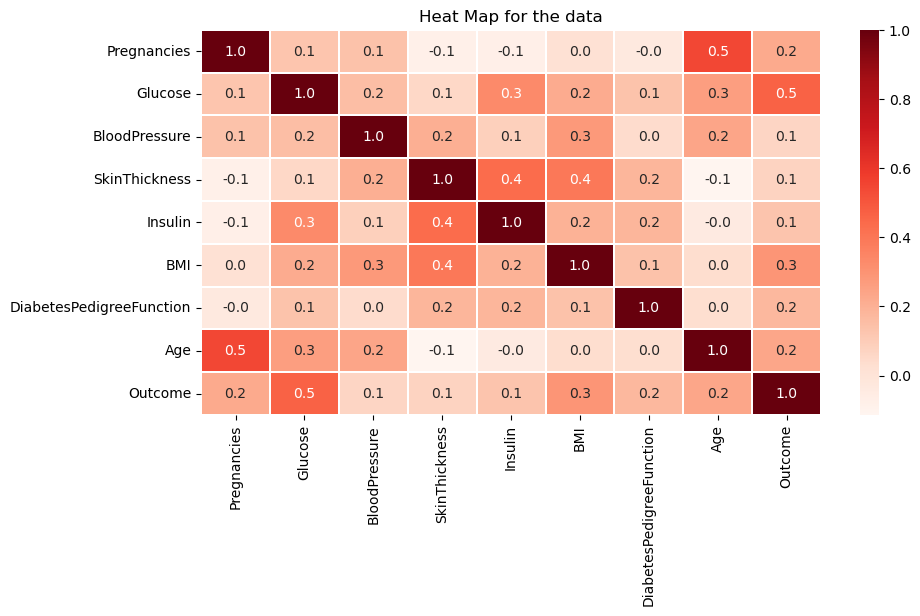

In [69]:
#understanding data

corr= dataset.corr()

plt.subplots(figsize=(10,5))
sns.heatmap(corr,cbar=True,linewidth=.2,annot=True,fmt=".1f",cmap="Reds")
plt.title("Heat Map for the data")
plt.show()

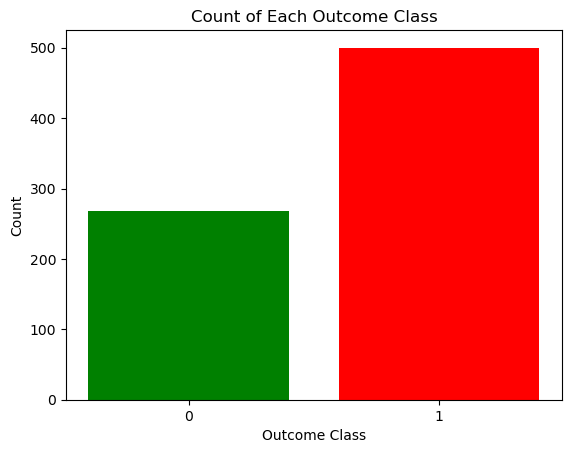

In [70]:
#bar plot for target class

plt.bar(dataset["Outcome"].unique(),dataset["Outcome"].value_counts(),color=["red","green"])
plt.xlabel("Outcome Class")
plt.xticks([0,1])
plt.ylabel("Count")
plt.title("Count of Each Outcome Class")
plt.show()

# Data Processing

In [6]:
x=dataset.drop(columns=["Outcome","SkinThickness"],axis=1)
y=dataset.Outcome

In [7]:
#StandardScaler
Scaler=StandardScaler()
Scaler.fit(x)
X=Scaler.transform(x)

In [8]:
#split training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,stratify=y,random_state=2)

# Machine Learning Model Selection

LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  78.58472998137802
Accuracy on Testing data:  77.92207792207793

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       150
           1       0.80      0.49      0.61        81

    accuracy                           0.78       231
   macro avg       0.79      0.71      0.73       231
weighted avg       0.78      0.78      0.76       231



In [10]:
from sklearn.svm import SVC

model2=SVC(kernel="linear")

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  77.83985102420856
Accuracy on Testing data:  78.78787878787878

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       150
           1       0.82      0.51      0.63        81

    accuracy                           0.79       231
   macro avg       0.80      0.72      0.74       231
weighted avg       0.79      0.79      0.77       231



In [11]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

model3.fit(x_train,y_train)

x_train_pred = model3.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model3.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  100.0
Accuracy on Testing data:  75.75757575757575

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



GaussianNB naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

model4.fit(x_train,y_train)

x_train_pred = model4.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model4.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  76.16387337057728
Accuracy on Testing data:  78.35497835497836

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.75      0.58      0.65        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



compare other,LogisticRegression get good accuracy both test and train

In [14]:
#predication


#input_Data = [6,148,72,0,33.6,0.627,50]  
input_Data = [1,89,66,94,28.1,0.167,21]
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = model1.predict(std)

print(predication)

if predication[0] == 0:
    print("The person does not have a diabetes")
    
else:
    print("The person hes diabetes ")

[0]
The person does not have a diabetes


In [15]:
#save the model

#location => D:\MACHINE LEARNING\FINAL PROJECT\Models\health\

import joblib

joblib.dump(model1,r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\Diabetes_model.pkl")

['D:\\MACHINE LEARNING\\FINAL PROJECT\\Models\\health\\Diabetes_model.pkl']

In [18]:
#load model

load_model = joblib.load(r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\Diabetes_model.pkl")


#predication

#input_Data = [6,148,72,0,33.6,0.627,50]  
input_Data = [1,89,66,94,28.1,0.167,21]
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = load_model.predict(std)

print(predication)

if predication[0] == 0:
    print("The person does not have a diabetes")
    
else:
    print("The person hes diabetes ")

[0]
The person does not have a diabetes


# Working Sucessfully